# Billboard EDA notebook, Volume 1

## dataset: https://data.world/kcmillersean/billboard-hot-100-1958-2017


#

In [1]:
# Packages and Settings

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import ipywidgets as widgets
from datetime import datetime
from IPython.display import display


%matplotlib inline
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [2]:
# importing Billboard CSV
billboard_df = pd.read_csv('data/Hot_Stuff.csv')

In [3]:
#shape of initial dataframe
billboard_df.shape

(317795, 10)

In [4]:
# Checking Initial Head
billboard_df.head()

,url,WeekID,Week Position,Song,Performer,SongID,Instance,Previous Week Position,Peak Position,Weeks on Chart
0,http://www.billboard.com/charts/hot-100/1990-0...,2/10/1990,75,Don't Wanna Fall In Love,Jane Child,Don't Wanna Fall In LoveJane Child,1,NaN,75,1
1,http://www.billboard.com/charts/hot-100/1990-0...,2/17/1990,53,Don't Wanna Fall In Love,Jane Child,Don't Wanna Fall In LoveJane Child,1,75.0,53,2
2,http://www.billboard.com/charts/hot-100/1990-0...,2/24/1990,43,Don't Wanna Fall In Love,Jane Child,Don't Wanna Fall In LoveJane Child,1,53.0,43,3
3,http://www.billboard.com/charts/hot-100/1990-0...,3/3/1990,37,Don't Wanna Fall In Love,Jane Child,Don't Wanna Fall In LoveJane Child,1,43.0,37,4
4,http://www.billboard.com/charts/hot-100/1990-0...,3/10/1990,27,Don't Wanna Fall In Love,Jane Child,Don't Wanna Fall In LoveJane Child,1,37.0,27,5


In [5]:
# Checking initial tail
billboard_df.tail()

,url,WeekID,Week Position,Song,Performer,SongID,Instance,Previous Week Position,Peak Position,Weeks on Chart
317790,http://www.billboard.com/charts/hot-100/1960-0...,7/2/1960,6,That's All You Gotta Do,Brenda Lee,That's All You Gotta DoBrenda Lee,1,17.0,6,5
317791,http://www.billboard.com/charts/hot-100/1968-0...,2/24/1968,6,Simon Says,1910 Fruitgum Co.,Simon Says1910 Fruitgum Co.,1,17.0,6,5
317792,http://www.billboard.com/charts/hot-100/1971-0...,3/6/1971,6,She's A Lady,Tom Jones,She's A LadyTom Jones,1,17.0,6,5
317793,http://www.billboard.com/charts/hot-100/1979-0...,6/9/1979,6,Ring My Bell,Anita Ward,Ring My BellAnita Ward,1,19.0,6,5
317794,http://www.billboard.com/charts/hot-100/1967-0...,6/24/1967,6,San Francisco (Be Sure To Wear Flowers In Your...,Scott McKenzie,San Francisco (Be Sure To Wear Flowers In Your...,1,20.0,6,5


## Note: there's no clear pattern to how the original dataframe is indexed. That's not a huge concern. I'm making a note for my own sake, because I tried and failed to figure out a pattern. 

## The dataset has 317,795 rows and 10 columns. Each row observation is a song on the Hot 100 chart for a given week. 

In [6]:
# Converting WeekID to datetime
# Note: I'm comfortable with replacing the string column "WeekID"

billboard_df['WeekID'] = pd.to_datetime(billboard_df['WeekID'])

In [7]:
# Renaming columns to Python standards

billboard_df = billboard_df.rename(columns={"url": "url", "WeekID": "week_id", "Week Position": 'week_position', "Song": 'song', "Performer": "performer", "SongID": "song_id", "Instance": "instance", "Previous Week Position": "prev_week_position", "Peak Position": "peak_position", "Weeks on Chart": "weeks_on_chart"})

In [8]:
# dropping 'URL' column- I don't think I'll reference it for now
# Note: I might be using the URL column if I end up doing some webscraping
billboard_df = billboard_df.drop(columns=['url'])

In [9]:
#creating date/month/day/year columns

billboard_df['date']= billboard_df['week_id'].dt.date
billboard_df['month'] = billboard_df['week_id'].dt.month
billboard_df['day']= billboard_df['week_id'].dt.day
billboard_df['year'] = billboard_df['week_id'].dt.year

In [10]:
# checking datatypes
billboard_df.dtypes

week_id               datetime64[ns]
week_position                  int64
song                          object
performer                     object
song_id                       object
instance                       int64
prev_week_position           float64
peak_position                  int64
weeks_on_chart                 int64
date                          object
month                          int64
day                            int64
year                           int64
dtype: object

In [11]:
#checking for null values
# it's ok that prev_week_position has nulls- I think that means the song made its debut on the charts
#(or made a reappearance)
billboard_df.isna().sum()

week_id                   0
week_position             0
song                      0
performer                 0
song_id                   0
instance                  0
prev_week_position    30428
peak_position             0
weeks_on_chart            0
date                      0
month                     0
day                       0
year                      0
dtype: int64

In [12]:
# checking earliest week id
billboard_df.week_id.min()

Timestamp('1958-08-02 00:00:00')

In [13]:
# checking latest week id
billboard_df.week_id.max()

Timestamp('2019-06-22 00:00:00')

(array([33500., 31300., 31300., 31300., 31400., 31295., 31300., 31300.,
        31300., 33800.]),
 array([1958. , 1964.1, 1970.2, 1976.3, 1982.4, 1988.5, 1994.6, 2000.7,
        2006.8, 2012.9, 2019. ]),
 <a list of 10 Patch objects>)

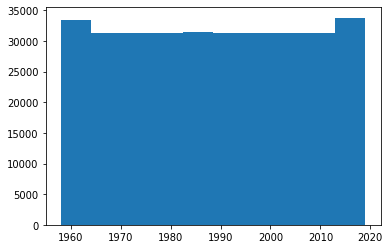

In [14]:
# checking distribution by year (validating data)
# note: this will not be in presentation
plt.hist(billboard_df.year)

##  so our dataframe is mostly uniform by year: we have 4 months of 1958 data, and 5.5 months of 2019 data. Maybe at some point I'll trim those from the df, depending on how much per-year stuff I do.

In [15]:
# validating distribution by month
billboard_df.month.value_counts()

12    27098
10    27000
8     27000
3     27000
1     27000
5     26900
7     26600
9     26200
4     26200
6     26100
11    26097
2     24600
Name: month, dtype: int64

In [16]:
# just validating the "prev_week_position" column
billboard_df.prev_week_position.max()

100.0

In [17]:
# validating "prev_week_position" column
billboard_df.prev_week_position.min()

1.0

In [18]:
# Performer value counts

# These are the artists who had the most observations in the dataset.

billboard_df.performer.value_counts()

Elton John                                                                              889
Taylor Swift                                                                            869
Madonna                                                                                 857
Tim McGraw                                                                              719
Kenny Chesney                                                                           709
Drake                                                                                   697
Stevie Wonder                                                                           659
Rod Stewart                                                                             657
Keith Urban                                                                             638
Michael Jackson                                                                         609
Mariah Carey                                                                    

In [19]:
# creating DF of performer value counts - this is just total appearances on chart, and does not consider chart position

performer_value_counts_df = billboard_df.performer.value_counts().to_frame().reset_index().rename(columns={"index": "performer", "performer": "total_weeks"})

In [20]:
# validating head of performer value counts
performer_value_counts_df.head()

,performer,total_weeks
0,Elton John,889
1,Taylor Swift,869
2,Madonna,857
3,Tim McGraw,719
4,Kenny Chesney,709


In [21]:
# checking description of total weeks in "performer value counts" df
performer_value_counts_df.total_weeks.describe()

count    9553.000000
mean       33.266513
std        63.141868
min         1.000000
25%         6.000000
50%        15.000000
75%        29.000000
max       889.000000
Name: total_weeks, dtype: float64

## We have 9,553 unique values in the "performer" column. This probably contains a lot of  "&"s and "feat.", so the true total is probably a bit lower. 

## The mean artist is on the charts for 33 weeks, and the median artist is on the charts for 15 weeks, meaning we have some skew from upper bound outliers. 

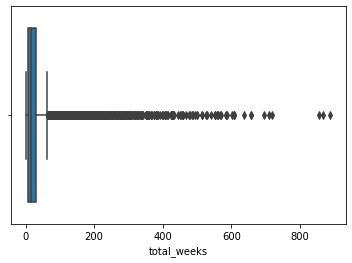

In [22]:
# plotting distribution of "total weeks" in "performer value counts"

ax = sns.boxplot(x="total_weeks", data=performer_value_counts_df)

In [23]:
# Calculating IQR for finding outliers
(29-6) * 1.5

34.5

In [24]:
# Calculating upper bound outlier cutoff
# note: we don't have any lower bound outliers, since IQR is greater than 25th percentile, and we have no negative values
29 + 34.5

63.5

In [25]:
# Note- I need to do a better method of making a dataframe based on a value range, but this is functional for now
# Making DF of performer outliers- 
# these are the performers whose total weeks on chart are larger than the upper whisker cutoff of 63.5 weeks

performer_outliers_df = performer_value_counts_df.head(1123)

In [26]:
performer_outliers_df.shape

(1123, 2)

In [27]:
performer_outliers_df.head()

,performer,total_weeks
0,Elton John,889
1,Taylor Swift,869
2,Madonna,857
3,Tim McGraw,719
4,Kenny Chesney,709


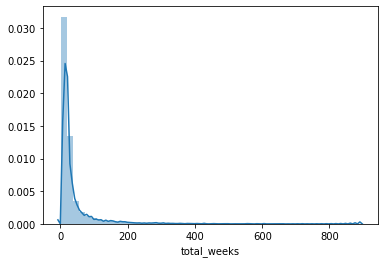

In [28]:
# Distribution plot for all artists in performer_value_counts
ax = sns.distplot(performer_value_counts_df.total_weeks)

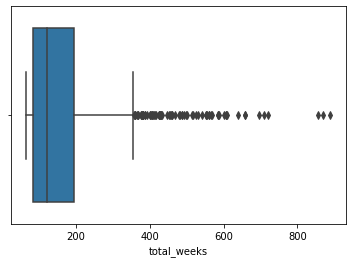

In [29]:
# Boxplot for "total weeks" in "performer outliers df"
# plotting distribution of "total weeks" in "performer value counts"

ax = sns.boxplot(x="total_weeks", data=performer_outliers_df)

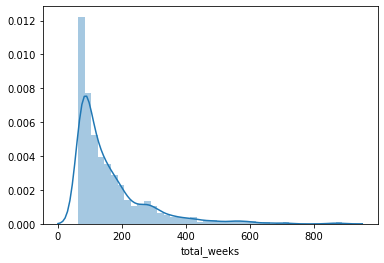

In [30]:
# distribution plot for all outlier artists in performer_outliers_df
ax = sns.distplot(performer_outliers_df.total_weeks)

# I'm not going to chase this rabbit hole, just wanted to check it out. this data will change once I've done a regex (or whatever) to account for duets and features. 

## note: for now, I'm going to leave a commented-out line with problematic names I find. I'll revisit when I figure out how I'm parsing names. 

In [31]:
# I guess the best way to do this would be a dictionary of sorts. 

# Problematic artist names:

# 'Kool & The Gang'
# 'Elvis Presley With The Jordanaires'- duplicate
# 'Huey Lewis & The News'
# 'Earth, Wind & Fire'
# 'Brooks & Dunn'
# 'James Brown And The Famous Flames' - duplicate
# 'Janet' vs 'Janet Jackson'
# 'Prince and the Revolution' - duplicate


In [32]:
# making value counts DF for individual songs
song_value_count_df = billboard_df.song_id.value_counts().to_frame().reset_index().rename(columns={"index": "song_id", "song_id": "total_weeks"})

In [33]:
# checking head of "song value counts" - total weeks on chart

song_value_count_df.head()

,song_id,total_weeks
0,RadioactiveImagine Dragons,87
1,SailAWOLNATION,79
2,I'm YoursJason Mraz,76
3,How Do I LiveLeAnn Rimes,69
4,Counting StarsOneRepublic,68


In [34]:
# checking distribution of total weeks by song
song_value_count_df.total_weeks.describe()

count    28193.000000
mean        11.272124
std          8.114231
min          1.000000
25%          5.000000
50%         10.000000
75%         16.000000
max         87.000000
Name: total_weeks, dtype: float64

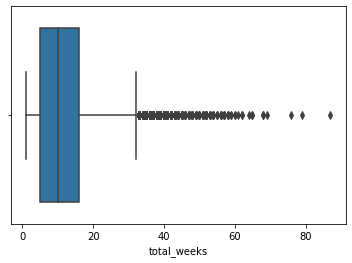

In [35]:
# boxplot of total weeks by song
ax = sns.boxplot(x="total_weeks", data=song_value_count_df)

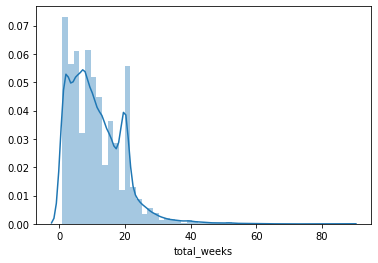

In [36]:
# Distribution of total weeks by song
ax = sns.distplot(song_value_count_df.total_weeks)

In [37]:
# re-checking value counts for "song value counts outliers" df

song_value_count_df.total_weeks.describe()

count    28193.000000
mean        11.272124
std          8.114231
min          1.000000
25%          5.000000
50%         10.000000
75%         16.000000
max         87.000000
Name: total_weeks, dtype: float64

In [38]:
# calculating IQR for "song total weeks outliers df"
IQR = 16 + (1.5 * (16-5))
print(IQR)

32.5


In [39]:
# count of "song total weeks outliers"
sum(i >= IQR for i in song_value_count_df.total_weeks)

489

In [40]:
song_value_count_df.head(490)

,song_id,total_weeks
0,RadioactiveImagine Dragons,87
1,SailAWOLNATION,79
2,I'm YoursJason Mraz,76
3,How Do I LiveLeAnn Rimes,69
4,Counting StarsOneRepublic,68
5,Party Rock AnthemLMFAO Featuring Lauren Bennet...,68
6,Foolish Games/You Were Meant For MeJewel,65
7,Rolling In The DeepAdele,65
8,Before He CheatsCarrie Underwood,64
9,You And MeLifehouse,62


In [41]:
# creating "song total weeks outliers df"
song_total_weeks_outliers_df = song_value_count_df.head(489)

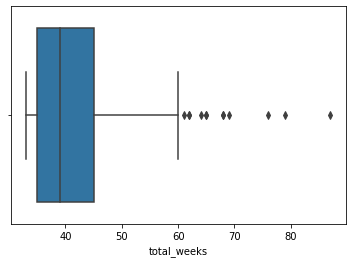

In [42]:
# boxplot of "song total weeks outliers df"
ax = sns.boxplot(x="total_weeks", data=song_total_weeks_outliers_df)

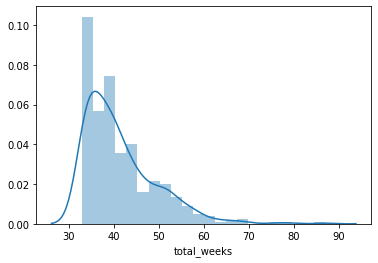

In [43]:
# distplot of "song total weeks outliers"

ax = sns.distplot(song_total_weeks_outliers_df.total_weeks)

In [44]:
# describing distribution of "total weeks" in "song total weeks df"
song_total_weeks_outliers_df.total_weeks.describe()

count    489.000000
mean      41.394683
std        8.005483
min       33.000000
25%       35.000000
50%       39.000000
75%       45.000000
max       87.000000
Name: total_weeks, dtype: float64

In [45]:
# checking for null values
billboard_df.isna().sum()

week_id                   0
week_position             0
song                      0
performer                 0
song_id                   0
instance                  0
prev_week_position    30428
peak_position             0
weeks_on_chart            0
date                      0
month                     0
day                       0
year                      0
dtype: int64

# The only variable with nulls is 'prev_week_position'. I assume that prev_week_position is null whenever it's a song's first week- I'll verify that by doing a unique count on song id

## Note: I guess the discrepancy comes from songs that make multiple runs in the top 100?

In [46]:
# count of unique Song IDs
billboard_df.song_id.nunique()

28193

In [47]:
# checking max of "instance" by song

billboard_df.instance.max()

8

In [ ]:
# value counts of "instance"
billboard_df['instance'].value_counts()

In [50]:
# creating groupby for "instance"
# we can treat the max value of "instance" as the number of instances a song had

unique_songs_groupby = billboard_df.groupby('song_id').max()

In [56]:
# checking head of "unique songs groupby" - 
unique_songs_groupby.head()

,week_id,week_position,song,performer,instance,prev_week_position,peak_position,weeks_on_chart,date,month,day,year
song_id,,,,,,,,,,,,
"""B"" GirlsYoung And Restless",1990-08-11,91,"""B"" Girls",Young And Restless,1,84.0,84,15,1990-08-11,8,30,1990
"""Cherry Cherry"" from Hot August NightNeil Diamond",1973-05-19,84,"""Cherry Cherry"" from Hot August Night",Neil Diamond,1,84.0,84,10,1973-05-19,5,31,1973
"""Having A Party"" MedleyThe Ovations (Featuring Louis Williams)",1973-12-08,99,"""Having A Party"" Medley",The Ovations (Featuring Louis Williams),1,99.0,99,9,1973-12-08,12,27,1973
"""Joy"" Pt. IIsaac Hayes",1974-02-16,72,"""Joy"" Pt. I",Isaac Hayes,1,72.0,72,9,1974-02-16,12,29,1974
"""Roots"" MedleyQuincy Jones",1977-04-16,87,"""Roots"" Medley",Quincy Jones,1,87.0,87,7,1977-04-16,4,26,1977


In [58]:
unique_songs_groupby.instance.describe()

count    28193.000000
mean         1.079807
std          0.334501
min          1.000000
25%          1.000000
50%          1.000000
75%          1.000000
max          8.000000
Name: instance, dtype: float64

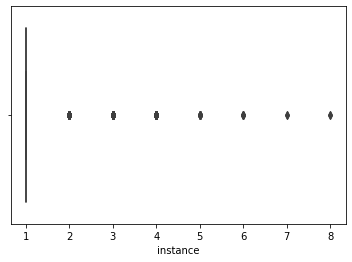

In [57]:
# boxplot of maximum instance per song - we can treat max as "number of instances"
ax = sns.boxplot(x="instance", data= unique_songs_groupby)

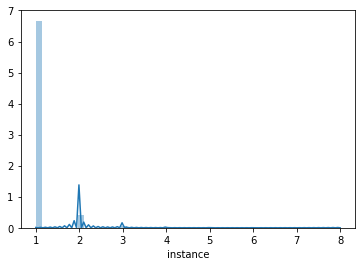

In [59]:
# distplot of instance by song

ax = sns.distplot(unique_songs_groupby.instance)

In [72]:
# making DF of value counts for 'instance by song id'

song_id_instance_value_counts_df = unique_songs_groupby.instance.value_counts().to_frame()

In [73]:
# checking head of song id instance value counts
song_id_instance_value_counts_df.head(10)

,instance
1,26325
2,1584
3,224
4,38
5,12
6,6
8,2
7,2


In [74]:
# applying lambda to find percentage of total songs with maximum instance

song_id_instance_value_counts_df['percentage'] = song_id_instance_value_counts_df.apply(lambda row: row.instance / 28193, axis=1)

In [75]:
# re-checking head of "song id instance value counts df"

song_id_instance_value_counts_df.head(10)

,instance,percentage
1,26325,0.933742
2,1584,0.056184
3,224,0.007945
4,38,0.001348
5,12,0.000426
6,6,0.000213
8,2,0.000071
7,2,0.000071


# Not sure how to quickly calculate this in a pythonic way, but 95% of observations pertain to a song's "initial run". 93% of songs have only one run. 

## It's possible that I can make my life easier on some analyses if I only look at a song's initial run.

In [77]:
# validating value counts of instance

billboard_df.instance.value_counts().sum()

317795

# The next few cells were exploratory. I was interested in what kind of songs were having multiple instances. I don't think I'll have anything else interesting going on. 

In [83]:
# checking out songs that have eight instances

eight_instances_df = billboard_df[billboard_df['instance'].isin([8])]

In [84]:
eight_instances_df.head(11)

,week_id,week_position,song,performer,song_id,instance,prev_week_position,peak_position,weeks_on_chart,date,month,day,year
231199,2018-12-08,23,Rockin' Around The Christmas Tree,Brenda Lee,Rockin' Around The Christmas TreeBrenda Lee,8,NaN,23,23,2018-12-08,12,8,2018
231200,2018-12-15,21,Rockin' Around The Christmas Tree,Brenda Lee,Rockin' Around The Christmas TreeBrenda Lee,8,23.0,21,24,2018-12-15,12,15,2018
231201,2018-12-01,29,All I Want For Christmas Is You,Mariah Carey,All I Want For Christmas Is YouMariah Carey,8,NaN,29,24,2018-12-01,12,1,2018
231202,2018-12-08,14,All I Want For Christmas Is You,Mariah Carey,All I Want For Christmas Is YouMariah Carey,8,29.0,14,25,2018-12-08,12,8,2018
231203,2018-12-22,18,Rockin' Around The Christmas Tree,Brenda Lee,Rockin' Around The Christmas TreeBrenda Lee,8,21.0,18,25,2018-12-22,12,22,2018
231204,2018-12-15,7,All I Want For Christmas Is You,Mariah Carey,All I Want For Christmas Is YouMariah Carey,8,14.0,7,26,2018-12-15,12,15,2018
231205,2018-12-29,11,Rockin' Around The Christmas Tree,Brenda Lee,Rockin' Around The Christmas TreeBrenda Lee,8,18.0,11,26,2018-12-29,12,29,2018
231206,2018-12-22,6,All I Want For Christmas Is You,Mariah Carey,All I Want For Christmas Is YouMariah Carey,8,7.0,6,27,2018-12-22,12,22,2018
231207,2019-01-05,9,Rockin' Around The Christmas Tree,Brenda Lee,Rockin' Around The Christmas TreeBrenda Lee,8,11.0,9,27,2019-01-05,1,5,2019
231208,2018-12-29,7,All I Want For Christmas Is You,Mariah Carey,All I Want For Christmas Is YouMariah Carey,8,6.0,6,28,2018-12-29,12,29,2018


In [87]:
# creating groupby to get unique SongIds
# note: I'm just using this to create a list - I'm not currently running any numbers on these lists. 
# that means that 'max' isn't actually being used: I just needed to pick a function to whittle down the groupby

eight_instances_groupby = eight_instances_df.groupby('song_id').max()

In [89]:
eight_instances_groupby.head()

,week_id,week_position,song,performer,instance,prev_week_position,peak_position,weeks_on_chart,date,month,day,year
song_id,,,,,,,,,,,,
All I Want For Christmas Is YouMariah Carey,2019-01-05,29,All I Want For Christmas Is You,Mariah Carey,8,29.0,29,29,2019-01-05,12,29,2019
Rockin' Around The Christmas TreeBrenda Lee,2019-01-05,23,Rockin' Around The Christmas Tree,Brenda Lee,8,23.0,23,27,2019-01-05,12,29,2019


 # This makes my life easier: 'Instance' seems to mean when a song makes a reappearance on the chart. 

In [90]:
seven_instances_df = billboard_df[billboard_df['instance'].isin([7])]

In [91]:
seven_instances_df.head(17)

,week_id,week_position,song,performer,song_id,instance,prev_week_position,peak_position,weeks_on_chart,date,month,day,year
231187,2018-12-08,39,The Christmas Song (Merry Christmas To You),Nat King Cole,The Christmas Song (Merry Christmas To You)Nat...,7,NaN,39,12,2018-12-08,12,8,2018
231188,2018-12-15,29,The Christmas Song (Merry Christmas To You),Nat King Cole,The Christmas Song (Merry Christmas To You)Nat...,7,39.0,29,13,2018-12-15,12,15,2018
231189,2018-12-22,24,The Christmas Song (Merry Christmas To You),Nat King Cole,The Christmas Song (Merry Christmas To You)Nat...,7,29.0,24,14,2018-12-22,12,22,2018
231190,2018-12-29,17,The Christmas Song (Merry Christmas To You),Nat King Cole,The Christmas Song (Merry Christmas To You)Nat...,7,24.0,17,15,2018-12-29,12,29,2018
231191,2019-01-05,11,The Christmas Song (Merry Christmas To You),Nat King Cole,The Christmas Song (Merry Christmas To You)Nat...,7,17.0,11,16,2019-01-05,1,5,2019
231192,2017-12-16,21,All I Want For Christmas Is You,Mariah Carey,All I Want For Christmas Is YouMariah Carey,7,NaN,21,20,2017-12-16,12,16,2017
231193,2017-12-23,37,Rockin' Around The Christmas Tree,Brenda Lee,Rockin' Around The Christmas TreeBrenda Lee,7,NaN,37,20,2017-12-23,12,23,2017
231194,2017-12-23,11,All I Want For Christmas Is You,Mariah Carey,All I Want For Christmas Is YouMariah Carey,7,21.0,11,21,2017-12-23,12,23,2017
231195,2017-12-30,34,Rockin' Around The Christmas Tree,Brenda Lee,Rockin' Around The Christmas TreeBrenda Lee,7,37.0,34,21,2017-12-30,12,30,2017
231196,2017-12-30,9,All I Want For Christmas Is You,Mariah Carey,All I Want For Christmas Is YouMariah Carey,7,11.0,9,22,2017-12-30,12,30,2017


In [92]:
six_instances_df = billboard_df[billboard_df['instance'].isin([6])]

In [93]:
six_instances_df.head(51)

,week_id,week_position,song,performer,song_id,instance,prev_week_position,peak_position,weeks_on_chart,date,month,day,year
231175,2017-12-23,42,The Christmas Song (Merry Christmas To You),Nat King Cole,The Christmas Song (Merry Christmas To You)Nat...,6,NaN,42,9,2017-12-23,12,23,2017
231176,2017-12-30,38,The Christmas Song (Merry Christmas To You),Nat King Cole,The Christmas Song (Merry Christmas To You)Nat...,6,42.0,38,10,2017-12-30,12,30,2017
231177,2018-01-06,42,The Christmas Song (Merry Christmas To You),Nat King Cole,The Christmas Song (Merry Christmas To You)Nat...,6,37.0,38,11,2018-01-06,1,6,2018
231178,2016-12-17,23,All I Want For Christmas Is You,Mariah Carey,All I Want For Christmas Is YouMariah Carey,6,NaN,23,15,2016-12-17,12,17,2016
231179,2017-03-04,95,Sex With Me,Rihanna,Sex With MeRihanna,6,NaN,95,15,2017-03-04,3,4,2017
231180,2016-12-24,17,All I Want For Christmas Is You,Mariah Carey,All I Want For Christmas Is YouMariah Carey,6,23.0,17,16,2016-12-24,12,24,2016
231181,2016-12-31,20,All I Want For Christmas Is You,Mariah Carey,All I Want For Christmas Is YouMariah Carey,6,17.0,17,17,2016-12-31,12,31,2016
231182,2016-12-24,37,Rockin' Around The Christmas Tree,Brenda Lee,Rockin' Around The Christmas TreeBrenda Lee,6,NaN,37,17,2016-12-24,12,24,2016
231183,2017-01-07,16,All I Want For Christmas Is You,Mariah Carey,All I Want For Christmas Is YouMariah Carey,6,20.0,16,18,2017-01-07,1,7,2017
231184,2016-12-31,48,Rockin' Around The Christmas Tree,Brenda Lee,Rockin' Around The Christmas TreeBrenda Lee,6,37.0,37,18,2016-12-31,12,31,2016


# Interesting results from these snapshots. It makes sense why the Christmas songs would reappear during the holidays. Apparently the Rihanna song was popular on, um, Valentine's Day Spotify playlists. 

## "Goosebumps" seems to be a weird case- jumping from not rated into the 40s. It seems to be related to him performing on the Ellen show? Maybe a future project is to look at "The Ellen Bump". That's a joke and I'm not going to do that, but it cracks me up.

## Some of the reappearances come from being "on the fringe"- Nicky Jam, Michael Buble and Amy Winehouse's songs fit that description. 

## These are fun snapshots, but I don't think there's anything that affects the project. This was just exploratory 

In [94]:
five_instances_df = billboard_df[billboard_df['instance'].isin([5])]

In [95]:
five_instances_groupby = five_instances_df.groupby('song_id').max()

In [97]:
five_instances_groupby.head(40)

,week_id,week_position,song,performer,instance,prev_week_position,peak_position,weeks_on_chart,date,month,day,year
song_id,,,,,,,,,,,,
All I Want For Christmas Is YouMariah Carey,2016-01-09,26,All I Want For Christmas Is You,Mariah Carey,5,26.0,26,14,2016-01-09,12,26,2016
AngelAkon,2011-05-14,96,Angel,Akon,5,96.0,96,10,2011-05-14,5,14,2011
Dear Future HusbandMeghan Trainor,2015-07-11,55,Dear Future Husband,Meghan Trainor,5,55.0,47,24,2015-07-11,7,30,2015
El AmanteNicky Jam,2017-07-22,94,El Amante,Nicky Jam,5,NaN,94,10,2017-07-22,7,22,2017
ElectricitySilk City x Dua Lipa,2019-02-02,90,Electricity,Silk City x Dua Lipa,5,68.0,62,10,2019-02-02,2,26,2019
GoosebumpsTravis Scott,2017-04-08,85,Goosebumps,Travis Scott,5,85.0,85,20,2017-04-08,4,28,2017
HomeMichael Buble,2005-08-13,96,Home,Michael Buble,5,NaN,96,6,2005-08-13,8,13,2005
Jingle Bell RockBobby Helms,2016-01-09,47,Jingle Bell Rock,Bobby Helms,5,NaN,47,17,2016-01-09,1,9,2016
MariaJohnny Mathis,1962-01-06,88,Maria,Johnny Mathis,5,NaN,88,8,1962-01-06,1,6,1962


In [98]:
billboard_df.instance.describe()

count    317795.000000
mean          1.064756
std           0.299354
min           1.000000
25%           1.000000
50%           1.000000
75%           1.000000
max           8.000000
Name: instance, dtype: float64

## interesting note: if IQR is 0, then I guess every song that makes more than 1 appearance is an "outlier". This is kind of frivolous, but it might mean that I can treat songs that make multiple runs as "abnormal"

In [99]:
billboard_df.song_id.nunique()

28193

# Note: I'm not implementing the next few cells: they were just exploring things with new dataframes. I am going to keep the lambda for 'string contains'

In [100]:
# Light exploration of duets + features

ampersand_df = billboard_df[billboard_df['performer'].str.contains("&")]

In [101]:
ampersand_df.shape

(22806, 13)

In [102]:
ampersand_df.head()

,week_id,week_position,song,performer,song_id,instance,prev_week_position,peak_position,weeks_on_chart,date,month,day,year
187,1984-04-14,92,Don't Waste Your Time,Yarbrough & Peoples,Don't Waste Your TimeYarbrough & Peoples,1,NaN,92,1,1984-04-14,4,14,1984
188,1984-04-21,80,Don't Waste Your Time,Yarbrough & Peoples,Don't Waste Your TimeYarbrough & Peoples,1,92.0,80,2,1984-04-21,4,21,1984
189,1984-04-28,75,Don't Waste Your Time,Yarbrough & Peoples,Don't Waste Your TimeYarbrough & Peoples,1,80.0,75,3,1984-04-28,4,28,1984
190,1984-05-05,66,Don't Waste Your Time,Yarbrough & Peoples,Don't Waste Your TimeYarbrough & Peoples,1,75.0,66,4,1984-05-05,5,5,1984
191,1984-05-12,60,Don't Waste Your Time,Yarbrough & Peoples,Don't Waste Your TimeYarbrough & Peoples,1,66.0,60,5,1984-05-12,5,12,1984


In [103]:
ampersand_df.performer.nunique()

1214

In [104]:
featuring_df = billboard_df[billboard_df['performer'].str.contains("Featuring")]

In [108]:
featuring_df.head(200)

,week_id,week_position,song,performer,song_id,instance,prev_week_position,peak_position,weeks_on_chart,date,month,day,year
36,2016-10-29,56,Don't Wanna Know,Maroon 5 Featuring Kendrick Lamar,Don't Wanna KnowMaroon 5 Featuring Kendrick Lamar,1,NaN,56,1,2016-10-29,10,29,2016
37,2016-11-05,9,Don't Wanna Know,Maroon 5 Featuring Kendrick Lamar,Don't Wanna KnowMaroon 5 Featuring Kendrick Lamar,1,56.0,9,2,2016-11-05,11,5,2016
38,2016-11-12,13,Don't Wanna Know,Maroon 5 Featuring Kendrick Lamar,Don't Wanna KnowMaroon 5 Featuring Kendrick Lamar,1,9.0,9,3,2016-11-12,11,12,2016
39,2016-11-19,11,Don't Wanna Know,Maroon 5 Featuring Kendrick Lamar,Don't Wanna KnowMaroon 5 Featuring Kendrick Lamar,1,13.0,9,4,2016-11-19,11,19,2016
40,2016-11-26,10,Don't Wanna Know,Maroon 5 Featuring Kendrick Lamar,Don't Wanna KnowMaroon 5 Featuring Kendrick Lamar,1,11.0,9,5,2016-11-26,11,26,2016
41,2016-12-03,10,Don't Wanna Know,Maroon 5 Featuring Kendrick Lamar,Don't Wanna KnowMaroon 5 Featuring Kendrick Lamar,1,10.0,9,6,2016-12-03,12,3,2016
42,2016-12-10,10,Don't Wanna Know,Maroon 5 Featuring Kendrick Lamar,Don't Wanna KnowMaroon 5 Featuring Kendrick Lamar,1,10.0,9,7,2016-12-10,12,10,2016
43,2016-12-17,8,Don't Wanna Know,Maroon 5 Featuring Kendrick Lamar,Don't Wanna KnowMaroon 5 Featuring Kendrick Lamar,1,10.0,8,8,2016-12-17,12,17,2016
44,2016-12-24,7,Don't Wanna Know,Maroon 5 Featuring Kendrick Lamar,Don't Wanna KnowMaroon 5 Featuring Kendrick Lamar,1,8.0,7,9,2016-12-24,12,24,2016
45,2016-12-31,10,Don't Wanna Know,Maroon 5 Featuring Kendrick Lamar,Don't Wanna KnowMaroon 5 Featuring Kendrick Lamar,1,7.0,7,10,2016-12-31,12,31,2016


In [106]:
featuring_df.performer.nunique()

2016

In [107]:
billboard_df.performer.nunique()

9553

In [ ]:
# Proportion of unique artists that contain an ampersand or "Featuring"

(2016 + 1214)/9553

# roughly 1/3rd of the unique performers have an ampersand or a "Featuring", so I'm going to need to do some sort of regex.

## note: I think it would be useful to report "raw artist counts" (ie without the regex), just to help tell the story of duets/features becoming more popular

# note: at some point, chart percentage of (ampersand/featuring) per year

In [ ]:
featuring_df.head(20)

In [116]:
billboard_df['has_feature'] = billboard_df.performer.apply(lambda x: 1 if 'Featuring' in x else 0)

In [117]:
billboard_df.head()

,week_id,week_position,song,performer,song_id,instance,prev_week_position,peak_position,weeks_on_chart,date,month,day,year,has_feature
0,1990-02-10,75,Don't Wanna Fall In Love,Jane Child,Don't Wanna Fall In LoveJane Child,1,NaN,75,1,1990-02-10,2,10,1990,0
1,1990-02-17,53,Don't Wanna Fall In Love,Jane Child,Don't Wanna Fall In LoveJane Child,1,75.0,53,2,1990-02-17,2,17,1990,0
2,1990-02-24,43,Don't Wanna Fall In Love,Jane Child,Don't Wanna Fall In LoveJane Child,1,53.0,43,3,1990-02-24,2,24,1990,0
3,1990-03-03,37,Don't Wanna Fall In Love,Jane Child,Don't Wanna Fall In LoveJane Child,1,43.0,37,4,1990-03-03,3,3,1990,0
4,1990-03-10,27,Don't Wanna Fall In Love,Jane Child,Don't Wanna Fall In LoveJane Child,1,37.0,27,5,1990-03-10,3,10,1990,0


In [118]:
featuring_df['has_feature'] = featuring_df.performer.apply(lambda x: 1 if 'Featuring' in x else 0)

C:\Users\dingw\Anaconda3_new\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [120]:
featuring_df.has_feature.value_counts()

1    29501
Name: has_feature, dtype: int64

In [121]:
billboard_df.has_feature.describe()

count    317795.000000
mean          0.092830
std           0.290195
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: has_feature, dtype: float64

In [ ]:
# means for 'has_feature'

In [127]:
year_groupby = billboard_df.groupby('year').mean()

In [128]:
year_groupby.head()

,week_position,instance,prev_week_position,peak_position,weeks_on_chart,month,day,has_feature,has_asterisk
year,,,,,,,,,
1958,50.495909,1.038636,45.251925,40.479545,5.513636,9.954545,15.681818,0.000000,0.0
1959,50.500000,1.045962,46.220912,41.329231,6.738846,6.461538,16.173077,0.000000,0.0
1960,50.499434,1.040189,46.569062,42.343019,6.588302,6.528302,15.811321,0.011321,0.0
1961,50.499615,1.057500,46.919264,45.059808,5.777692,6.615385,15.500000,0.002308,0.0
1962,50.500000,1.083846,47.120845,45.968654,6.091731,6.576923,15.673077,0.004423,0.0


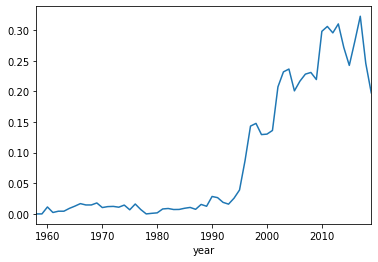

In [125]:
year_groupby.has_feature.plot()

## Sample dataframes- this is just me seeing what dataframes with 1, 2, and 3 observations look like. I'm not using any of this in presentation or in subsequent analysis

In [130]:
one_week_value_count_df = song_value_count_df[song_value_count_df['total_weeks'].isin([1])]

In [131]:
one_week_value_count_df.shape

(2011, 2)

In [132]:
one_week_value_count_df.head(50)

,song_id,total_weeks
26182,Break My HeartSpectacular! Cast,1
26183,RunMatt Nathanson Featuring Sugarland,1
26184,Green Grass Of TexasThe Texans,1
26185,Just BecauseThe McGuire Sisters,1
26186,Raise Your GlassGlee Cast,1
26187,ExplosionsEllie Goulding,1
26188,Hopeless WandererMumford & Sons,1
26189,True ColorsZedd & Kesha,1
26190,Final FantasyDrake,1
26191,Down That RoadAlisan Porter,1


In [133]:
remedy_adele_df = billboard_df[billboard_df['song_id'].str.contains("RemedyAdele")]

In [134]:
remedy_adele_df.shape

(1, 15)

In [135]:
remedy_adele_df.head()

,week_id,week_position,song,performer,song_id,instance,prev_week_position,peak_position,weeks_on_chart,date,month,day,year,has_feature,has_asterisk
72478,2015-12-12,87,Remedy,Adele,RemedyAdele,1,NaN,87,1,2015-12-12,12,12,2015,0,0


In [136]:
two_week_value_count_df = song_value_count_df[song_value_count_df['total_weeks'].isin([2])]

In [137]:
# note: what's going on with the font in 'Green Christmas?'
# postscript: the italicized was because the song is "Green Chri$tma$" and the italics do something weird and markdowny
two_week_value_count_df.head(50)

,song_id,total_weeks
24646,Love Me For What I Am/there Ain't No WayLobo,2
24647,OperatorGladys Knight And The Pips,2
24648,BuzzkillLuke Bryan,2
24649,SweetheartPeggy Lee,2
24650,A Little Feeling (Called Love)Jack Scott,2
24651,Turn Loose Of My LegJim Stafford,2
24652,We Know The WayOpetaia Foa'i & Lin-Manuel Miranda,2
24653,I've Got The SkillJackie Ross,2
24654,I Can SurviveTriumph,2
24655,All I KnowThe Weeknd Featuring Future,2


In [138]:
# Checking out Green Christmas
flawless = billboard_df[billboard_df['performer'].str.contains(" Or ")]

In [139]:
flawless.song_id.value_counts().sum()

340

In [142]:
flawless.year.value_counts()

2014    57
2003    49
2013    39
1985    25
1987    23
2007    20
1996    20
2004    20
2018    16
2009    15
1998    14
2017     9
1989     8
2015     8
2005     6
1986     5
2010     4
2011     2
Name: year, dtype: int64

In [140]:
dont_hurt_yourself_df = billboard_df[billboard_df['song_id'].str.contains("Don't Hurt YourselfBeyonce Featuring Jack White")]

In [141]:
dont_hurt_yourself_df.head()

,week_id,week_position,song,performer,song_id,instance,prev_week_position,peak_position,weeks_on_chart,date,month,day,year,has_feature,has_asterisk
1756,2016-05-14,28,Don't Hurt Yourself,Beyonce Featuring Jack White,Don't Hurt YourselfBeyonce Featuring Jack White,1,NaN,28,1,2016-05-14,5,14,2016,1,0
119881,2016-05-21,37,Don't Hurt Yourself,Beyonce Featuring Jack White,Don't Hurt YourselfBeyonce Featuring Jack White,1,28.0,28,2,2016-05-21,5,21,2016,1,0


## Note: I tried to just pick out a song I knew, but this is unexpected - a song from a huge artist being on the charts for 2 weeks, being in the Top 40 both weeks, and then just disappearing. I'm going to verify this quickly

In [143]:
beyonce_doublecheck_df = billboard_df[billboard_df['performer'].str.contains("Beyonce Featuring Jack White")]

In [144]:
beyonce_doublecheck_df.head(50)

,week_id,week_position,song,performer,song_id,instance,prev_week_position,peak_position,weeks_on_chart,date,month,day,year,has_feature,has_asterisk
1756,2016-05-14,28,Don't Hurt Yourself,Beyonce Featuring Jack White,Don't Hurt YourselfBeyonce Featuring Jack White,1,NaN,28,1,2016-05-14,5,14,2016,1,0
119881,2016-05-21,37,Don't Hurt Yourself,Beyonce Featuring Jack White,Don't Hurt YourselfBeyonce Featuring Jack White,1,28.0,28,2,2016-05-21,5,21,2016,1,0


In [145]:
beyonce_triplecheck_df = billboard_df[billboard_df['song'].str.contains("Don't Hurt Yourself")]

In [146]:
beyonce_triplecheck_df.head(50)

,week_id,week_position,song,performer,song_id,instance,prev_week_position,peak_position,weeks_on_chart,date,month,day,year,has_feature,has_asterisk
1756,2016-05-14,28,Don't Hurt Yourself,Beyonce Featuring Jack White,Don't Hurt YourselfBeyonce Featuring Jack White,1,NaN,28,1,2016-05-14,5,14,2016,1,0
119881,2016-05-21,37,Don't Hurt Yourself,Beyonce Featuring Jack White,Don't Hurt YourselfBeyonce Featuring Jack White,1,28.0,28,2,2016-05-21,5,21,2016,1,0


# ok, looks like the data is valid, and Wikipedia backs it. This is something interesting to think about: I assumed that songs slowly faded away, and I guess they don't always do that

In [147]:
three_week_value_count_df = song_value_count_df[song_value_count_df['total_weeks'].isin([3])]

In [148]:
three_week_value_count_df.head(50)

,song_id,total_weeks
23274,Girls Are Out To Get YouThe Fascinations,3
23275,It's UnbelievableThe Larks,3
23276,It's All Right (You're Just In Love)The Tams,3
23277,Chip Away The StoneAerosmith,3
23278,Wanna Be Startin' Somethin' 2008Michael Jackso...,3
23279,NumbXXXTENTACION,3
23280,Gentle On My MindAretha Franklin,3
23281,Found LoveJimmy Reed,3
23282,I'm A RockerRaspberries,3
23283,Come Into My LifeJimmy Cliff,3


In [149]:
shooting_shark_df = billboard_df[billboard_df['song_id'].str.contains("Shooting SharkBlue Oyster Cult")]

In [150]:
shooting_shark_df.head()

,week_id,week_position,song,performer,song_id,instance,prev_week_position,peak_position,weeks_on_chart,date,month,day,year,has_feature,has_asterisk
75038,1984-02-11,94,Shooting Shark,Blue Oyster Cult,Shooting SharkBlue Oyster Cult,1,NaN,94,1,1984-02-11,2,11,1984,0,0
126843,1984-02-18,85,Shooting Shark,Blue Oyster Cult,Shooting SharkBlue Oyster Cult,1,94.0,85,2,1984-02-18,2,18,1984,0,0
168888,1984-02-25,83,Shooting Shark,Blue Oyster Cult,Shooting SharkBlue Oyster Cult,1,85.0,83,3,1984-02-25,2,25,1984,0,0


In [151]:
# Calculating "Week-Points"- my way of considering chart position

billboard_df['week_points'] = billboard_df.apply(lambda row: 101- row.week_position, axis=1)

In [152]:
# Creating 'Point_ratio' variable

billboard_df['point_ratio'] = billboard_df.apply(lambda row: ((row.week_points)/(row.weeks_on_chart)), axis=1)

## note: I need to tinker with the idea of 'point_ratio'. I'm trying to get at whether a song is a "lingerer", or whether it comes and goes quickly. 

In [153]:
billboard_df.head(200)

,week_id,week_position,song,performer,song_id,instance,prev_week_position,peak_position,weeks_on_chart,date,month,day,year,has_feature,has_asterisk,week_points,point_ratio
0,1990-02-10,75,Don't Wanna Fall In Love,Jane Child,Don't Wanna Fall In LoveJane Child,1,NaN,75,1,1990-02-10,2,10,1990,0,0,26,26.000000
1,1990-02-17,53,Don't Wanna Fall In Love,Jane Child,Don't Wanna Fall In LoveJane Child,1,75.0,53,2,1990-02-17,2,17,1990,0,0,48,24.000000
2,1990-02-24,43,Don't Wanna Fall In Love,Jane Child,Don't Wanna Fall In LoveJane Child,1,53.0,43,3,1990-02-24,2,24,1990,0,0,58,19.333333
3,1990-03-03,37,Don't Wanna Fall In Love,Jane Child,Don't Wanna Fall In LoveJane Child,1,43.0,37,4,1990-03-03,3,3,1990,0,0,64,16.000000
4,1990-03-10,27,Don't Wanna Fall In Love,Jane Child,Don't Wanna Fall In LoveJane Child,1,37.0,27,5,1990-03-10,3,10,1990,0,0,74,14.800000
5,1990-03-17,24,Don't Wanna Fall In Love,Jane Child,Don't Wanna Fall In LoveJane Child,1,27.0,24,6,1990-03-17,3,17,1990,0,0,77,12.833333
6,1990-03-24,12,Don't Wanna Fall In Love,Jane Child,Don't Wanna Fall In LoveJane Child,1,24.0,12,7,1990-03-24,3,24,1990,0,0,89,12.714286
7,1990-03-31,6,Don't Wanna Fall In Love,Jane Child,Don't Wanna Fall In LoveJane Child,1,12.0,6,8,1990-03-31,3,31,1990,0,0,95,11.875000
8,1990-04-07,6,Don't Wanna Fall In Love,Jane Child,Don't Wanna Fall In LoveJane Child,1,6.0,6,9,1990-04-07,4,7,1990,0,0,95,10.555556
9,1990-04-14,2,Don't Wanna Fall In Love,Jane Child,Don't Wanna Fall In LoveJane Child,1,6.0,2,10,1990-04-14,4,14,1990,0,0,99,9.900000


In [154]:
# validating- we want this to be homogenous
billboard_df.week_points.value_counts()

20     3180
83     3180
75     3179
86     3179
48     3179
53     3179
43     3179
38     3179
34     3179
67     3179
31     3179
71     3179
27     3179
51     3179
93     3179
96     3179
41     3178
7      3178
35     3178
36     3178
5      3178
39     3178
40     3178
15     3178
16     3178
44     3178
45     3178
46     3178
47     3178
4      3178
3      3178
42     3178
33     3178
32     3178
23     3178
17     3178
13     3178
18     3178
12     3178
21     3178
22     3178
24     3178
8      3178
25     3178
49     3178
11     3178
28     3178
30     3178
10     3178
100    3178
1      3178
99     3178
85     3178
74     3178
77     3178
78     3178
79     3178
81     3178
84     3178
87     3178
70     3178
89     3178
90     3178
92     3178
94     3178
97     3178
98     3178
73     3178
76     3178
69     3178
63     3178
54     3178
55     3178
57     3178
58     3178
59     3178
60     3178
61     3178
64     3178
68     3178
65     3178
37     3177
80     3177
29  

# Making groupbys - I'm just going to make them for now and explore at some point

In [155]:
performer_groupby = billboard_df.groupby('performer')

In [156]:
song_id_groupby = billboard_df.groupby('song_id')

In [157]:
year_groupby = billboard_df.groupby('year')

In [158]:
song_id_summed_groupby = song_id_groupby.sum()

In [159]:
song_id_summed_groupby.week_points.max()

5932

In [161]:


song_id_summed_groupby.head(100)

,week_position,instance,prev_week_position,peak_position,weeks_on_chart,month,day,year,has_feature,has_asterisk,week_points,point_ratio
song_id,,,,,,,,,,,,
"""B"" GirlsYoung And Restless",1065,15,974.0,889,120,94,227,29850,0,0,450,92.268570
"""Cherry Cherry"" from Hot August NightNeil Diamond",479,10,428.0,459,55,40,178,19730,0,0,531,117.089683
"""Having A Party"" MedleyThe Ovations (Featuring Louis Williams)",684,9,622.0,678,45,98,123,17757,9,0,225,41.320238
"""Joy"" Pt. IIsaac Hayes",380,9,338.0,368,45,34,140,17764,0,0,529,134.590079
"""Roots"" MedleyQuincy Jones",494,7,411.0,468,28,24,89,13839,0,0,213,65.321429
"""Yep!""Duane Eddy His Twangy Guitar And The Rebels",507,9,429.0,386,45,39,136,17631,0,0,402,94.755556
#1 Dee JayGoody Goody,452,5,353.0,418,15,58,70,9890,0,0,53,28.733333
#1Nelly,802,20,730.0,637,210,139,290,40029,0,0,1218,173.312236
#9 DreamJohn Lennon,367,12,320.0,325,78,42,162,23698,0,0,845,171.544444


In [164]:
song_id_summed_groupby.head(200)

,week_position,instance,prev_week_position,peak_position,weeks_on_chart,month,day,year,has_feature,has_asterisk,week_points,point_ratio
song_id,,,,,,,,,,,,
"""B"" GirlsYoung And Restless",1065,15,974.0,889,120,94,227,29850,0,0,450,92.268570
"""Cherry Cherry"" from Hot August NightNeil Diamond",479,10,428.0,459,55,40,178,19730,0,0,531,117.089683
"""Having A Party"" MedleyThe Ovations (Featuring Louis Williams)",684,9,622.0,678,45,98,123,17757,9,0,225,41.320238
"""Joy"" Pt. IIsaac Hayes",380,9,338.0,368,45,34,140,17764,0,0,529,134.590079
"""Roots"" MedleyQuincy Jones",494,7,411.0,468,28,24,89,13839,0,0,213,65.321429
"""Yep!""Duane Eddy His Twangy Guitar And The Rebels",507,9,429.0,386,45,39,136,17631,0,0,402,94.755556
#1 Dee JayGoody Goody,452,5,353.0,418,15,58,70,9890,0,0,53,28.733333
#1Nelly,802,20,730.0,637,210,139,290,40029,0,0,1218,173.312236
#9 DreamJohn Lennon,367,12,320.0,325,78,42,162,23698,0,0,845,171.544444


# OK taking inventory really quickly:

## billboard_df is the original dataset
## performer_groupby is a groupby by performer
## song_id_groupby is a groupby by song_id
## sample_groupby is a groupby with a sum: so it's the cumulative stats for an individual song. Right now the most useful column is week_points, but other stuff might be useful


In [165]:
# This is the largest song's cumulative week_points divided by the whole dataframe's week_points. 

# This ratio is laughably small now, but it might be a helpful ratio for future analyses. 

5932/16048874

0.00036962094661594327

In [166]:
song_id_summed_groupby.week_points.describe()

count    28193.00000
mean       569.25031
std        625.16761
min          1.00000
25%         89.00000
50%        361.00000
75%        877.00000
max       5932.00000
Name: week_points, dtype: float64

In [167]:
# Calculating IQR for sample_groupby

877-89

788

In [168]:
788 * 1.5

1182.0

In [169]:
1182 + 877

2059

In [171]:
song_id_summed_groupby = song_id_summed_groupby.sort_values(by=['week_points'], ascending=False)

In [172]:
song_id_outliers_df = song_id_summed_groupby.head(854)

In [174]:
song_id_outliers_df.head(854)

,week_position,instance,prev_week_position,peak_position,weeks_on_chart,month,day,year,has_feature,has_asterisk,week_points,point_ratio
song_id,,,,,,,,,,,,
RadioactiveImagine Dragons,2855,172,2708.0,1991,3828,562,1345,175134,0,0,5932,165.943973
How Do I LiveLeAnn Rimes,1354,69,1309.0,411,2415,473,1093,137834,0,0,5615,322.369223
Foolish Games/You Were Meant For MeJewel,1066,65,1019.0,457,2145,409,1030,129808,0,0,5499,331.566640
I'm YoursJason Mraz,2243,76,2195.0,1345,2926,510,1199,152649,0,0,5433,217.181048
Party Rock AnthemLMFAO Featuring Lauren Bennett & GoonRock,1517,135,1390.0,507,2346,429,1098,136777,68,0,5351,280.409712
Shape Of YouEd Sheeran,656,58,633.0,58,1711,356,887,116995,0,0,5202,449.216257
Counting StarsOneRepublic,1789,68,1739.0,650,2346,473,1070,136926,0,0,5079,282.569753
Uptown Funk!Mark Ronson Featuring Bruno Mars,693,57,650.0,174,1596,374,896,112836,56,0,4963,372.076322
Rolling In The DeepAdele,1607,129,1490.0,592,2145,389,1042,130729,0,0,4958,261.852441


## song_id_outliers is the dataframe with all songs with a cumulative week-point over 2059, which is the upper whisker on the box-and-whisker of all songs and their cumulative week-points. I might call this "mega-hits" at some point

In [175]:
song_id_outliers_df = song_id_outliers_df.sort_values(by=['point_ratio'], ascending=True).reset_index()

In [176]:
song_id_outliers_df.head(854)

,song_id,week_position,instance,prev_week_position,peak_position,weeks_on_chart,month,day,year,has_feature,has_asterisk,week_points,point_ratio
0,"Eastsidebenny blanco, Halsey & Khalid",388,25,379.0,234,900,87,362,50475,0,0,2137,62.455677
1,Little TalksOf Monsters And Men,2485,70,2382.0,2298,1176,279,749,96594,0,0,2363,123.002837
2,Why MeKris Kristofferson,1696,38,1644.0,1530,741,303,581,74974,0,0,2142,124.314574
3,SailAWOLNATION,3982,138,3846.0,3210,3160,550,1207,159001,0,0,3997,128.976115
4,Don't Mess With My ManNivea Featuring Brian & ...,1395,36,1350.0,1229,666,246,560,72087,36,0,2241,130.818456
5,It's TimeImagine Dragons,2012,47,1963.0,1786,1128,314,724,94583,0,0,2735,132.529186
6,RockstarNickelback,2166,79,2046.0,1725,1225,397,757,98335,0,0,2783,132.913531
7,This Is Your NightAmber,1736,40,1689.0,1617,820,286,627,79851,0,0,2304,135.404297
8,DemonsImagine Dragons,2461,158,2261.0,1862,1891,357,942,122820,0,0,3700,135.411531
9,Don't Trust Me3OH!3,1473,73,1326.0,1134,703,178,582,74332,0,0,2264,136.431492


## This is actually interesting- "Sail" is a song with the second-most weeks on chart ever, but it doesn't have a ton of week_points. Maybe at some point I compare the two. 

In [177]:
featuring_outliers_df = song_id_outliers_df[song_id_outliers_df['song_id'].str.contains("Featuring")]

In [178]:
song_id_outliers_df.shape

(854, 13)

In [179]:
featuring_outliers_df.shape

(199, 13)

In [180]:
featuring_outliers_df.head(199)

,song_id,week_position,instance,prev_week_position,peak_position,weeks_on_chart,month,day,year,has_feature,has_asterisk,week_points,point_ratio
4,Don't Mess With My ManNivea Featuring Brian & ...,1395,36,1350.0,1229,666,246,560,72087,36,0,2241,130.818456
14,I Hate U I Love Ugnash Featuring Olivia O'Brien,1450,39,1409.0,1295,780,305,620,78628,39,0,2489,145.930549
15,G.D.F.R.Flo Rida Featuring Sage The Gemini & L...,1329,100,1088.0,1069,630,176,563,70520,35,0,2206,147.123548
20,LatchDisclosure Featuring Sam Smith,1138,64,993.0,845,561,241,524,66462,33,0,2195,151.092377
22,Post To BeOmarion Featuring Chris Brown & Jhen...,1303,37,1255.0,1096,703,201,597,74555,37,0,2434,151.749776
31,South SideMoby Featuring Gwen Stefani,1125,32,1079.0,1010,528,160,504,64027,32,0,2107,159.832759
52,Worth ItFifth Harmony Featuring Kid Ink,1267,105,1042.0,1001,666,240,568,72540,36,0,2369,170.632566
68,Get LowLil Jon & The East Side Boyz Featuring ...,1207,45,1158.0,896,1035,312,723,90145,45,0,3338,176.158533
69,ClarityZedd Featuring Foxes,1048,33,1004.0,868,561,243,509,66429,33,0,2285,176.304169
75,Like I'm Gonna Lose YouMeghan Trainor Featurin...,1302,39,1256.0,1023,780,262,614,78601,39,0,2637,177.583950


In [181]:
ampersand_outliers_df = song_id_outliers_df[song_id_outliers_df['song_id'].str.contains("&")]

In [182]:
ampersand_outliers_df.shape

(78, 13)

In [183]:
ampersand_outliers_df.head(78)

,song_id,week_position,instance,prev_week_position,peak_position,weeks_on_chart,month,day,year,has_feature,has_asterisk,week_points,point_ratio
0,"Eastsidebenny blanco, Halsey & Khalid",388,25,379.0,234,900,87,362,50475,0,0,2137,62.455677
4,Don't Mess With My ManNivea Featuring Brian & ...,1395,36,1350.0,1229,666,246,560,72087,36,0,2241,130.818456
15,G.D.F.R.Flo Rida Featuring Sage The Gemini & L...,1329,100,1088.0,1069,630,176,563,70520,35,0,2206,147.123548
22,Post To BeOmarion Featuring Chris Brown & Jhen...,1303,37,1255.0,1096,703,201,597,74555,37,0,2434,151.749776
28,Ex's & Oh'sElle King,1399,38,1350.0,1067,741,258,598,76585,0,0,2439,155.630954
68,Get LowLil Jon & The East Side Boyz Featuring ...,1207,45,1158.0,896,1035,312,723,90145,45,0,3338,176.158533
81,Where Are U NowSkrillex & Diplo With Justin Bi...,1482,45,1433.0,948,1035,321,715,90679,0,0,3063,179.793187
82,Hold My HandHootie & The Blowfish,1435,44,1387.0,1103,990,275,682,87767,0,0,3009,179.948476
84,StarvingHailee Steinfeld & Grey Featuring Zedd,866,29,826.0,739,435,221,455,58473,29,0,2063,180.663588
100,Young Dumb & BrokeKhalid,1238,35,1193.0,1014,630,248,555,70608,0,0,2297,187.697567


In [184]:
both_outliers_df = featuring_outliers_df[featuring_outliers_df['song_id'].str.contains("&")]

In [185]:
both_outliers_df.shape

(37, 13)

In [186]:
both_outliers_df.head(37)

,song_id,week_position,instance,prev_week_position,peak_position,weeks_on_chart,month,day,year,has_feature,has_asterisk,week_points,point_ratio
4,Don't Mess With My ManNivea Featuring Brian & ...,1395,36,1350.0,1229,666,246,560,72087,36,0,2241,130.818456
15,G.D.F.R.Flo Rida Featuring Sage The Gemini & L...,1329,100,1088.0,1069,630,176,563,70520,35,0,2206,147.123548
22,Post To BeOmarion Featuring Chris Brown & Jhen...,1303,37,1255.0,1096,703,201,597,74555,37,0,2434,151.749776
68,Get LowLil Jon & The East Side Boyz Featuring ...,1207,45,1158.0,896,1035,312,723,90145,45,0,3338,176.158533
84,StarvingHailee Steinfeld & Grey Featuring Zedd,866,29,826.0,739,435,221,455,58473,29,0,2063,180.663588
115,LoyalChris Brown Featuring Lil Wayne & French ...,1190,36,1144.0,795,666,202,550,72504,36,0,2446,193.028422
162,Can't Hold UsMacklemore & Ryan Lewis Featuring...,936,76,792.0,513,780,259,626,78507,39,0,3003,202.425219
169,Can I Get A...Jay-Z Featuring Amil (Of Major C...,1380,37,1336.0,1007,703,220,575,73950,37,0,2357,204.425028
184,Lose ControlMissy Elliott Featuring Ciara & Fa...,667,28,623.0,453,406,231,444,56140,28,0,2161,208.158865
188,Thrift ShopMacklemore & Ryan Lewis Featuring Wanz,1126,97,983.0,672,1225,311,755,98626,49,0,3823,208.438636


In [187]:
199 + 78 - 37

240

In [188]:
240/854

0.2810304449648712

## so out of our 854 'megahits', 28% have a 'Featuring' or an '&'. It appears to skew towards more recent years, so that's something to look at. 

In [189]:
performer_groupby.head()

,week_id,week_position,song,performer,song_id,instance,prev_week_position,peak_position,weeks_on_chart,date,month,day,year,has_feature,has_asterisk,week_points,point_ratio
0,1990-02-10,75,Don't Wanna Fall In Love,Jane Child,Don't Wanna Fall In LoveJane Child,1,NaN,75,1,1990-02-10,2,10,1990,0,0,26,26.000000
1,1990-02-17,53,Don't Wanna Fall In Love,Jane Child,Don't Wanna Fall In LoveJane Child,1,75.0,53,2,1990-02-17,2,17,1990,0,0,48,24.000000
2,1990-02-24,43,Don't Wanna Fall In Love,Jane Child,Don't Wanna Fall In LoveJane Child,1,53.0,43,3,1990-02-24,2,24,1990,0,0,58,19.333333
3,1990-03-03,37,Don't Wanna Fall In Love,Jane Child,Don't Wanna Fall In LoveJane Child,1,43.0,37,4,1990-03-03,3,3,1990,0,0,64,16.000000
4,1990-03-10,27,Don't Wanna Fall In Love,Jane Child,Don't Wanna Fall In LoveJane Child,1,37.0,27,5,1990-03-10,3,10,1990,0,0,74,14.800000
21,2011-06-04,92,Don't Wanna Go Home,Jason Derulo,Don't Wanna Go HomeJason Derulo,1,NaN,92,1,2011-06-04,6,4,2011,0,0,9,9.000000
22,2011-06-11,18,Don't Wanna Go Home,Jason Derulo,Don't Wanna Go HomeJason Derulo,1,92.0,18,2,2011-06-11,6,11,2011,0,0,83,41.500000
23,2011-06-18,17,Don't Wanna Go Home,Jason Derulo,Don't Wanna Go HomeJason Derulo,1,18.0,17,3,2011-06-18,6,18,2011,0,0,84,28.000000
24,2011-06-25,18,Don't Wanna Go Home,Jason Derulo,Don't Wanna Go HomeJason Derulo,1,17.0,17,4,2011-06-25,6,25,2011,0,0,83,20.750000
25,2011-07-02,14,Don't Wanna Go Home,Jason Derulo,Don't Wanna Go HomeJason Derulo,1,18.0,14,5,2011-07-02,7,2,2011,0,0,87,17.400000


In [190]:
performer_summed_groupby = performer_groupby.sum()

In [191]:
performer_summed_groupby.head(200)

,week_position,instance,prev_week_position,peak_position,weeks_on_chart,month,day,year,has_feature,has_asterisk,week_points,point_ratio
performer,,,,,,,,,,,,
"""Groove"" Holmes",1000,14,846.0,982,72,112,198,27524,0,0,414,71.615043
"""Little"" Jimmy Dickens",422,10,375.0,377,55,110,168,19650,0,0,588,116.827778
"""Pookie"" Hudson",96,1,0.0,96,1,5,25,1963,0,0,5,5.000000
"""Weird Al"" Yankovic",5492,91,4462.0,3897,601,544,1458,181406,0,0,3699,1030.830306
'N Sync,5006,172,4478.0,3356,2004,1042,2577,343972,0,0,12366,1853.549915
'N Sync & Gloria Estefan,1078,22,888.0,518,210,181,300,39983,0,0,942,174.100306
'N Sync Featuring Nelly,461,20,418.0,291,210,81,298,40040,20,0,1559,227.308446
'Til Tuesday,2905,53,2462.0,2475,412,344,886,105251,0,0,2448,421.054043
(+44),89,1,0.0,89,1,12,2,2006,0,0,12,12.000000


In [196]:

performer_summed_groupby = performer_summed_groupby.sort_values(by=['week_points'], ascending=False)

In [198]:
performer_summed_groupby.head(5000)

,performer,week_position,instance,prev_week_position,peak_position,weeks_on_chart,month,day,year,has_feature,has_asterisk,week_points,point_ratio
9552,Madonna,29188,857,24576.0,12426,8391,5545,13405,1707296,0,0,57369,11464.679419
9550,Elton John,34312,892,29773.0,23644,8165,6053,13817,1764035,0,0,55477,10122.254063
9548,Taylor Swift,33121,1324,27140.0,20768,12746,5787,13843,1748032,0,0,54648,9421.504154
9541,Mariah Carey,14851,735,12428.0,7015,7517,4056,9477,1213160,0,0,46456,7192.811592
9546,Stevie Wonder,24017,659,20465.0,17915,5147,4291,10293,1302158,0,0,42542,8077.358602
9551,The Beatles,16615,600,13266.0,12363,3548,3600,9157,1151382,0,0,42470,10823.190711
9549,Drake,30393,741,23189.0,19010,6807,4633,10863,1404599,0,0,40004,9541.856644
9544,Michael Jackson,21742,620,18314.0,12248,5531,3942,9559,1209852,0,0,39767,7676.026410
9520,Rihanna,19057,668,16611.0,12592,7404,3752,8835,1138046,0,0,38109,4845.809939
9538,Rod Stewart,28497,657,24631.0,21320,5831,4370,10428,1303905,0,0,37860,6647.111769


In [194]:
janet_triplecheck_df = billboard_df[billboard_df['performer'].str.contains("Janet")]

In [195]:
janet_triplecheck_df.head(724)

,week_id,week_position,song,performer,song_id,instance,prev_week_position,peak_position,weeks_on_chart,date,month,day,year,has_feature,has_asterisk,week_points,point_ratio
508,1995-06-17,5,Scream/Childhood,Michael Jackson & Janet Jackson,Scream/ChildhoodMichael Jackson & Janet Jackson,1,NaN,5,1,1995-06-17,6,17,1995,0,0,96,96.000000
518,1995-09-16,6,Runaway,Janet Jackson,RunawayJanet Jackson,1,NaN,6,1,1995-09-16,9,16,1995,0,0,95,95.000000
599,1993-05-01,14,That's The Way Love Goes,Janet Jackson,That's The Way Love GoesJanet Jackson,1,NaN,14,1,1993-05-01,5,1,1993,0,0,87,87.000000
602,2001-03-17,14,All For You,Janet,All For YouJanet,1,NaN,14,1,2001-03-17,3,17,2001,0,0,87,87.000000
609,1993-10-23,15,Again,Janet Jackson,AgainJanet Jackson,1,NaN,15,1,1993-10-23,10,23,1993,0,0,86,86.000000
768,1994-03-19,10,Because Of Love,Janet Jackson,Because Of LoveJanet Jackson,1,11.0,10,8,1994-03-19,3,19,1994,0,0,91,11.375000
1266,2002-09-14,31,Feel It Boy,Beenie Man Featuring Janet,Feel It BoyBeenie Man Featuring Janet,1,28.0,28,7,2002-09-14,9,14,2002,1,0,70,10.000000
1683,1992-05-30,24,The Best Things In Life Are Free,Luther Vandross And Janet Jackson With BBD And...,The Best Things In Life Are FreeLuther Vandros...,1,NaN,24,1,1992-05-30,5,30,1992,0,0,77,77.000000
1766,1994-01-29,29,Because Of Love,Janet Jackson,Because Of LoveJanet Jackson,1,NaN,29,1,1994-01-29,1,29,1994,0,0,72,72.000000
1780,1994-05-28,30,"Any Time, Any Place/And On And On",Janet Jackson,"Any Time, Any Place/And On And OnJanet Jackson",1,NaN,30,1,1994-05-28,5,28,1994,0,0,71,71.000000


# This is the end of what I originally wrote. 

# I'm going to use a new notebook to re-run all the charts I did for total weeks on chart-points